In [1]:
from utils.DataProcessor import DataProcessor
from utils.signalExtractor import SignalExtractor
from utils.config import FitSettings

import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import uproot
import os

import mplhep as hep
hep.style.use(hep.style.ALICE)

# Read the data
When the data is read it must be defined in the following way: output folder containing subfolders corresponding to the datasets. 

In [2]:
directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/030225_tableReaderwME/"
#directory_to_TRoutput_from_HL = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/190325_nominalCuts/"
datasets = [
    #"DQ_LHC22_pass7_skimmed_dielectron_kaon",
    "DQ_LHC24aj_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24af_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ag_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24al_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24am_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24an_pass1_skimmed_dielectron_kaon",
    "DQ_LHC24ao_pass1_skimmed_dielectron_kaon"
]

In [3]:
processor = DataProcessor(directory_to_TRoutput_from_HL, datasets, verbose=False)

# Read the dataset
total_data, _ = processor.read_data(read_ME=False)

******* DATASET: DQ_LHC24aj_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24af_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24ag_pass1_skimmed_dielectron_kaon
******* DATASET: DQ_LHC24al_pass1_skimmed_dielectron_kaon
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1572020/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571953/AO2D.root/hy_1571953 is not being read properly
⚠️ Dataframe is empty. 554207, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571945/AO2D.root/hy_1571945 is not being read properly
⚠️ Dataframe is empty. 554201, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/hy_1571943/AO2D.root/hy_157

In [4]:
# Preprocess the data (removing nan and relabeling columns)
total_data = processor.pre_processing(total_data)

⚠️ WARNING: 8 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 8 candidates pass no cuts - fIsBarrelSelected =0 


In [5]:
# Translate from bitmap columns and create columns with cuts being passed
config_cuts, name_electron_cuts, name_kaon_cuts = processor.read_cuts_from_configfile()

In [6]:
# This returns a warning if there is a mismatch in the entries in the histograms of the AnalyisResults.root file and the derived dataset
processor.compare_to_AnalysisResult(total_data, verbose=False)

⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24af_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ag_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24al_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24am_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24an_pass1_skimmed_dielectron_kaon/AnalysisResults.root file not found
⚠️ WARNING: /Users/idats/cernbox/work/bmeson/analysisOutputRun3/100325_systematics_output2/DQ_LHC24ao_pass1_skimmed_dielectron_kaon/AnalysisResults.root file no

In [7]:
#plot_bins = np.linspace(3, 10, 500)
#processor.plot_datasets(total_data, bins=plot_bins)

# Read MC

In [8]:
# reading a single AO2D.root.file 
#list_of_dataframes, _ = mc_processor.read_AO2D(MCdatapath, _, _, _, "dileptonAOD.root")
#local_run_df = pd.concat(list_of_dataframes, ignore_index=True) if list_of_dataframes else pd.DataFrame()

In [9]:
MCdatapath = "/Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/"
mc_processor = DataProcessor(MCdatapath, ["LHC25b17"], verbose=False)

# Read the dataset
total_mc, _ = mc_processor.read_data(read_ME=False)

******* DATASET: LHC25b17
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651883/AO2D.root
⚠️ Dataframe is empty. 556370, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651756/AO2D.root/hy_1651756 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651749/AO2D.root
⚠️ Dataframe is empty. 555965, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651743/AO2D.root/hy_1651743 is not being read properly
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651680/AO2D.root
⚠️ WARNING: 3 File not found /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_1651673/AO2D.root
⚠️ Dataframe is empty. 554322, /Users/idats/cernbox/work/bmeson/analysisOutputRun3/180325_LHC25b17_QA/LHC25b17/hy_

In [10]:
total_mc = mc_processor.pre_processing(total_mc)

⚠️ WARNING: 11 candidates pass no cuts - fIsJpsiFromBSelected =0 
⚠️ WARNING: 11 candidates pass no cuts - fIsBarrelSelected =0 


In [11]:
mc_config_cuts, mc_name_electron_cuts, mc_name_kaon_cuts = mc_processor.read_cuts_from_configfile()

In [12]:
mc_processor.compare_to_AnalysisResult(total_mc, verbose=False)

# Apply cuts

In [13]:
data_with_cuts = total_data
mc_with_cuts = total_mc

tauCut = 0.0004
chi2cut = 2

In [14]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fTauxyBcandidate"] > tauCut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fTauxyBcandidate"] > tauCut]

In [15]:
data_with_cuts = data_with_cuts.loc[data_with_cuts["fChi2Bcandidate"] < chi2cut]
mc_with_cuts = mc_with_cuts.loc[mc_with_cuts["fChi2Bcandidate"] < chi2cut]

In [16]:
jpsi_minMass = 2.8
jpsi_maxMass = 3.2
data_with_cuts = data_with_cuts.loc[(data_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(data_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]
mc_with_cuts = mc_with_cuts.loc[(mc_with_cuts["fMassDileptonCandidate"] > jpsi_minMass)&(mc_with_cuts["fMassDileptonCandidate"] < jpsi_maxMass)]

# Signal extraction

In [17]:
import numpy as np
import pandas as pd
#from iminuit import Minuit
#from iminuit.cost import LeastSquares
#from .config import FitSettings
#from .utils import FitUtils
#from .plotting import Plotting

class SignalExtractor:
    def __init__(self, df: pd.DataFrame, settings: FitSettings):
        self.df = df.loc[
            (df[settings.pt_column_name] > settings.pTmin) &
            (df[settings.pt_column_name] < settings.pTmax)
        ]
        self.settings = settings

        self.number_of_bins = int((settings.fitMax-settings.fitMin)/settings.bin_width)
        self.bins = np.linspace(settings.fitMin, settings.fitMax, self.number_of_bins + 1)
        self.bin_centers = (self.bins[:-1] + self.bins[1:]) / 2

        self.data_counts = None
        self.data_errors = None
        self.bin_edges = None

        #self.signal_function = None
        # self.comb_background_function = None
        # self.total_fit_func = None
        #self.chi2_reduced = 0

    def bin_data(self):
        self.data_counts, self.bin_edges = np.histogram(self.df[self.settings.mass_column_name], bins=self.bins)
        self.data_errors = np.sqrt(self.data_counts)
        
    def _get_non_empty_bins(self):
        bin_mask = self.data_counts >= 1
        return self.bin_centers[bin_mask], self.data_counts[bin_mask], self.data_errors[bin_mask]
        
    def template_fit_func(self, x, n_sig, a, b):
        """
        Fit function using internal template (e.g. MC signal) and a linear background.
        """
        if self.corrbkg_function is None:
            raise ValueError("Correlated background template (self.corrbkg_function) is not set!")

        #signal_component = n_sig * FitUtils.template_lookup(x, self.signal_function, self.bins)
        background_component = n * exp(a * x)
        return signal_component + background_component

    def fit(fit_func): 
        
        #self.total_fit_func = func
        #self.signal_function = signal_func
        #self.corrbkg_function = corr_bkg_func
        self.total_fit_func = fit_func
        #exclude bins with few counts in the fit
        x_data, y_data, y_data_err = self._get_non_empty_bins()
        
        # define staring values for the fit
        #param_values = self.background_guess # take values from initalization of the background function
        #func_params = inspect.signature(func).parameters
        #for param in func_params: # use physically motivated parameters for a gaussian, else scale to 1
        #    if param not in param_values: 
        #        if param=='x': continue
        #        elif param=='n_sig': param_values.update({"n_sig":100})
        #        elif param=='mu': param_values.update({"mu":5.3})
        #        elif param=='sigma': param_values.update({"sigma":0.1})
        #        else: param_values.update({param:1.})
        
        # ----- Peform fit ------
        least_squares = LeastSquares(x_data, y_data, y_data_err, self.total_fit_func)
        minuit = Minuit(least_squares, **param_values)
        
    def plot_invariant_mass(self, plot_contributions=False):
        
        fig, ax = plt.subplots(figsize=(12, 10))
        ax.errorbar(self.bin_centers, self.data_counts, yerr=self.data_errors, fmt='o', color='black', ecolor='black', capsize=0, label='Data')


In [44]:
class TemplateMaker: 
    def __init__(self, mc_df: pd.DataFrame, settings: FitSettings):
        
        self.mc_df = mc_df.loc[
            (mc_df[settings.pt_column_name] > settings.pTmin) &
            (mc_df[settings.pt_column_name] < settings.pTmax)
        ]
        
        self.settings = settings

        self.number_of_bins = int((settings.fitMax-settings.fitMin)/settings.bin_width)
        self.bins = np.linspace(settings.fitMin, settings.fitMax, self.number_of_bins + 1)
        self.bin_centers = (self.bins[:-1] + self.bins[1:]) / 2
    
    def _generate_signal_template(self):
        
        df_signal = pd.concat([self.mc_df.loc[self.mc_df["fMcFlag"] == settings.signal_channels[sig]] for sig in settings.signal_channels])
        self.signal_template, _ = np.histogram(df_signal[settings.mass_column_name], bins=self.bins)
        self.signal_template_norm  = self.signal_template/np.sum(self.signal_template)
    
    def _generate_corrbkg_template(self):
        
        self.corrbkg_templates = {}
        
        for corrbkg, flag in settings.background_channels.items():
            df_corrbkg = self.mc_df.loc[(self.mc_df["fMcFlag"] == flag)&(self.mc_df[settings.mass_column_name] < 5.2)]

            corrbkg_template, _ = np.histogram(df_corrbkg[settings.mass_column_name], bins=self.bins)
            self.corrbkg_templates[corrbkg] = corrbkg_template

        #df_all_corrbkg = pd.concat(df_corrbkg_list, ignore_index=True)
        #corrbkg_template, _ = np.histogram(df_all_corrbkg[settings.mass_column_name], bins=self.bins)
        #self.corrbkg_template_norm = corrbkg_template / np.sum(corrbkg_template)
        #self.combined_corr_template = no.s
        
    def generate_mc_templates(self):

        self._generate_signal_template()
        self._generate_corrbkg_template()
        
        #fig, ax = plt.subplots(figsize=(10, 6)) 
        #ax.plot(self.bin_centers, self.signal_template_norm, linewidth=2, color='tab:blue', label=r"B$^\pm \rightarrow J/\psi + K^\pm$")
        #ax.plot(self.bin_centers, self.corrbkg_template_norm, linewidth=2, color='tab:orange', label=r"B$^\pm \rightarrow J/\psi + K^\pm$")
        
        return self._generate_signal_template, self._generate_corrbkg_template
    
    def plot_mc_signals(self): 
        
        mc_df_binned, _ = np.histogram(self.mc_df[settings.mass_column_name], bins=self.bins)
        
        # Plot histograms
        plt.hist(self.bins[:-1], bins=self.bins, weights=mc_df_binned, alpha=0.4, label="All MC data")  # Filled histogram
        plt.hist(self.bins[:-1], bins=self.bins, weights=self.signal_template, alpha=0.4, label=r"$B^\pm \rightarrow J/\psi + K^\pm$ (exclusive)")  # Filled histogram
         
        for i in self.corrbkg_templates.keys(): 
            plt.hist(self.bins[:-1], bins=self.bins, weights=self.corrbkg_templates[i], histtype="step", linestyle="dotted", linewidth=1.5, label=i)

        plt.xlabel(settings.xaxis_label, fontsize=24)
        plt.yscale("log")
        plt.legend(loc="upper right")
        plt.show()
        #plt.("MCsignals.png")
        

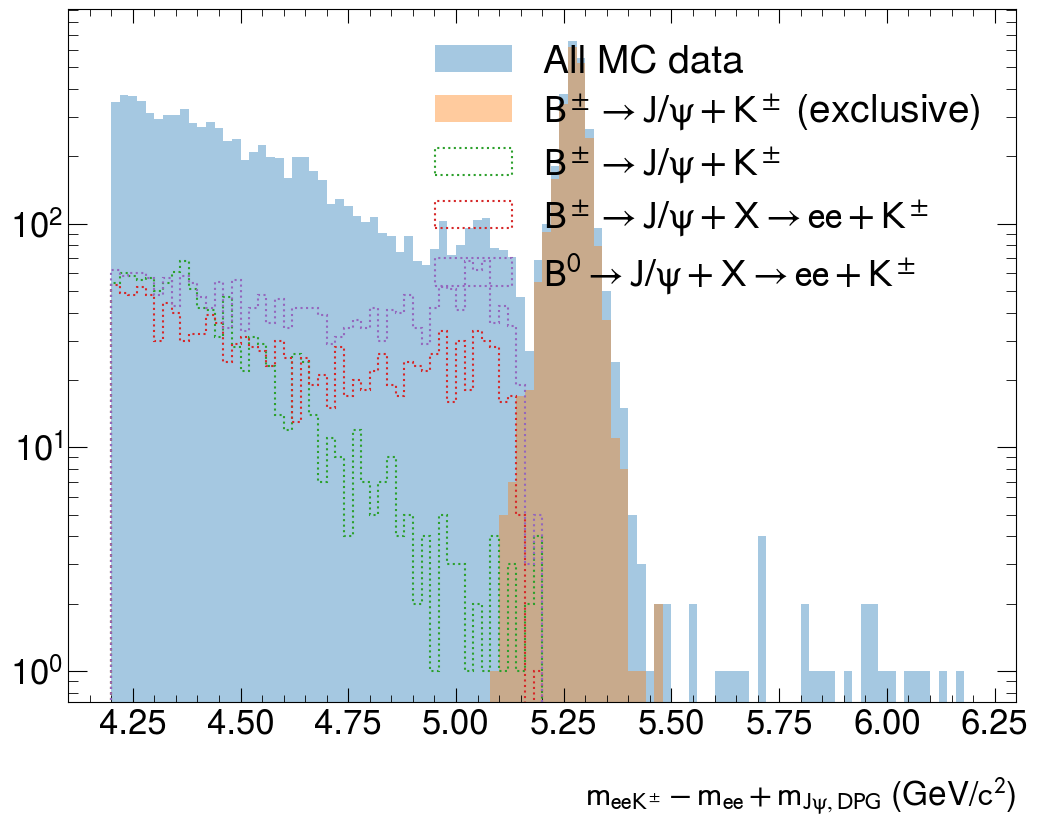

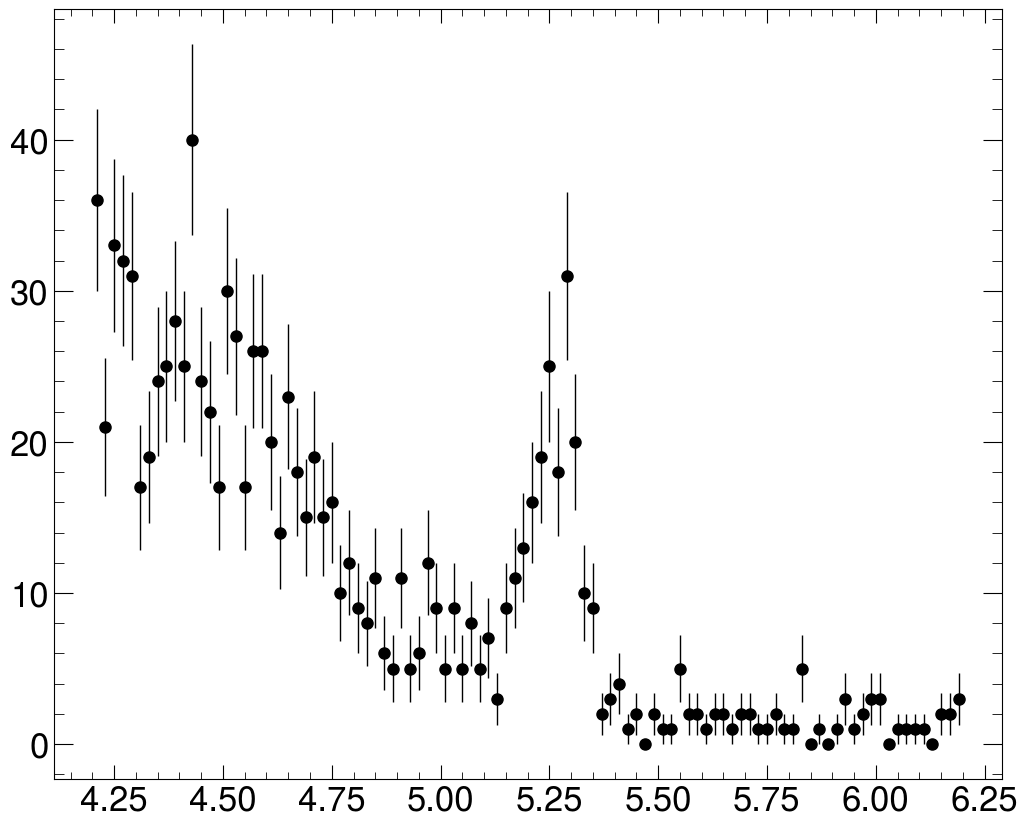

In [45]:
# I would like it to be: you initialize the fit with wanted signal shape, wanted parameterization for combinatorial background, and template for correlated background
# FOCUS: Get the signal extraction to work in a loop

# When you managed this: do this: 
# TODO: Make the template plot to show all components
# TODO: incorporate a KDE 

settings = FitSettings(pTmin=8, pTmax=10, fitMin=4.2, fitMax=6.2, bin_width=0.02)

# generate MC templates
templateMaker = TemplateMaker(mc_with_cuts, settings=settings)
signal_template, corrbkg_template = templateMaker.generate_mc_templates()
#templateMaker.plot_mc_signals()

extractor = SignalExtractor(data_with_cuts, settings=settings)
extractor.corrbkg_function = corrbkg_template
extractor.bin_data()

extractor.plot_invariant_mass()

In [20]:
mc_df_binned, _ = np.histogram(mc_df2024['correctedMass'], bins=bins)
mc_signal_binned, _ = np.histogram(mc_signal['correctedMass'], bins=bins)
mc_notexclusive_binned, _ = np.histogram(mc_not_exclusive['correctedMass'], bins=bins)
mc_kaon_res_binned, _ = np.histogram(mc_kaon_res['correctedMass'], bins=bins)
mc_b0_binned, _ = np.histogram(mc_b0['correctedMass'], bins=bins)

# Plot histograms
plt.hist(bins[:-1], bins=bins, weights=mc_df_binned, alpha=0.4, label="All MC data")  # Filled histogram
plt.hist(bins[:-1], bins=bins, weights=mc_signal_binned, alpha=0.4, label=r"$B^\pm \rightarrow J/\psi + K^\pm$ (exclusive)")  # Filled histogram

# Dotted line histograms
plt.hist(bins[:-1], bins=bins, weights=mc_notexclusive_binned, histtype="step", linestyle="dotted", linewidth=1.5, label=r"$B^\pm \rightarrow J/\psi + K^\pm + X$")
plt.hist(bins[:-1], bins=bins, weights=mc_kaon_res_binned, histtype="step", linestyle="dotted", linewidth=1.5, label=r"$B^\pm \rightarrow J/\psi + X \rightarrow ee + K^\pm$")
plt.hist(bins[:-1], bins=bins, weights=mc_b0_binned, histtype="step", linestyle="dotted", linewidth=1.5, label=r"$B^0 \rightarrow J/\psi + X \rightarrow ee + K^\pm$")

# Labels and legenda
plt.title("MC signal contributions before cuts")
plt.xlabel(r'$m_{eeK^\pm} - m_{ee} + m_{J\psi, DPG}$ (GeV/$c^2$)', fontsize=24)
plt.yscale("log")
plt.legend(loc="upper right")
plt.show()
#plt.("MCsignals.png")

NameError: name 'mc_df2024' is not defined

In [ ]:
yield_per_cut_combination = pd.DataFrame()
#for i, jpsi_maxMass in enumerate([3.13, 3.15, 3.2, 3.25, 3.27]):
    #for j, jpsi_minMass in enumerate([2.5, 2.6, 2.7, 2.8, 2.9, 3.0]):
for i, jpsi_maxMass in enumerate([ 3.25, 3.27]):
    for j, jpsi_minMass in enumerate([2.7, 2.8]):
